<a href="https://colab.research.google.com/github/Priscillebk/Apprendre-SQL-pour-debutant-Tutoriel-SQL-complet/blob/main/BANK_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Chargement et Aperçu des Données**





#Analyse des objectifs stratégiques de la banque

###Objectif business:
La banque cherche à augmenter le taux de souscription aux dépôts à terme tout en réduisant les coûts des campagnes marketing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv('/content/bank-full.csv', sep=';')

# Aperçu des premières lignes
print(df.head())

# Vérification des types de colonnes (16 caractéristiques au total)
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

                age        balance      duration      campaign
count  45211.000000   45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080      2.763841
std       10.618762    3044.765829    257.527812      3.098021
min       18.000000   -8019.000000      0.000000      1.000000
25%       33.000000      72.000000    103.000000      1.000000
50%       39.000000     448.000000    180.000000      2.000000
75%       48.000000    1428.000000    319.000000      3.000000
max       95.000000  102127.000000   4918.000000     63.000000


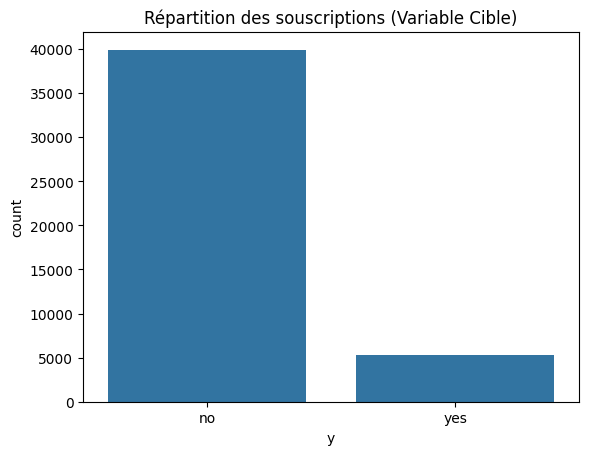

In [2]:
# Statistiques pour les variables numériques
print(df[['age', 'balance', 'duration', 'campaign']].describe())

# Visualisation de la variable cible 'y' (Abonnement au dépôt)
sns.countplot(x='y', data=df)
plt.title('Répartition des souscriptions (Variable Cible)')
plt.show()

In [3]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des outliers
df_cleaned = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

In [5]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


###Aucune donnéé n'est manquante. Tout est bien rempli.

In [6]:
# Doublons

df.duplicated().sum()

np.int64(0)

Il n'y a pas de valuers manquantes

#Les Statistiques descriptive

In [8]:
quantivars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
quantivars

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
df[quantivars].mean()


,0
age,40.936210
balance,1362.272058
day,15.806419
duration,258.163080
campaign,2.763841
pdays,40.197828
previous,0.580323


###Ces résultats correspondent aux valeurs moyennes des variables quantitatives du jeu de données.

Les résultats montrent que les clients contactés ont en moyenne 41 ans et disposent d’un solde bancaire modéré. Les campagnes sont menées de façon régulière au cours du mois, avec des appels d’environ 4 minutes en moyenne. Chaque client est contacté près de trois fois par campagne, ce qui traduit une stratégie de relance modérée. La plupart des clients ont eu peu d’interactions lors de campagnes précédentes, suggérant un ciblage en grande partie orienté vers des clients peu sollicités.

In [14]:
df[quantivars].std()

,0
age,10.618762
balance,3044.765829
day,8.322476
duration,257.527812
campaign,3.098021
pdays,100.128746
previous,2.303441


Les écarts-types indiquent une forte hétérogénéité entre les clients. L’âge est relativement dispersé autour de la moyenne, tandis que le solde bancaire présente une très forte variabilité, traduisant des situations financières très différentes. La durée des appels et le nombre de contacts par campagne varient également fortement selon les clients. En particulier, la variable pdays affiche une dispersion élevée, suggérant des stratégies de recontact très inégales. Cette variabilité justifie une segmentation fine de la clientèle et l’usage de méthodes statistiques et prédictives pour adapter la stratégie marketing.

In [19]:
((df[quantivars].std() / df[quantivars].mean())*100).sort_values(ascending=False)

,0
previous,396.923707
pdays,249.089941
balance,223.506444
campaign,112.091154
duration,99.753928
day,52.652509
age,25.939778


###Interprétation

previous : très variable, certains clients ont été beaucoup contactés auparavant, la majorité peu ou pas.

pdays : forte dispersion, le temps depuis le dernier contact varie énormément.

balance : solde bancaire très hétérogène, certains clients ont peu d’épargne, d’autres beaucoup.

campaign et duration : nombre de contacts et durée des appels très variables, pouvant influencer la souscription.

age et day : relativement stables, peu de variation autour de la moyenne.

Conclusion : ces résultats montrent la nécessité d’une segmentation fine et justifient la normalisation des variables quantitatives avant modélisation.

In [23]:
percentile_90 = df.balance.quantile(0.9)
pct_top10 = (df['balance'] > percentile_90).mean() * 100
print(f"{pct_top10:.2f}% des clients font partie des 10% ayant le plus d'épargne")



10.00% des clients font partie des 10% ayant le plus d'épargne


##Observer comment les clients “yes” et “no” diffèrent sur les variables quantitatives afin d’identifier des segments à fort potentiel.

In [24]:
 #Moyennes et écarts-types par groupe y
group_stats = df.groupby('y')[quantivars].agg(['mean', 'std'])

# Affichage
print(group_stats)

           age                 balance                     day            \
          mean        std         mean          std       mean       std   
y                                                                          
no   40.838986  10.172662  1303.714969  2974.195473  15.892290  8.294728   
yes  41.670070  13.497781  1804.267915  3501.104777  15.158253  8.501875   

       duration              campaign                pdays              \
           mean         std      mean       std       mean         std   
y                                                                        
no   221.182806  207.383237  2.846350  3.212767  36.421372   96.757135   
yes  537.294574  392.525262  2.141047  1.921826  68.702968  118.822266   

     previous            
         mean       std  
y                        
no   0.502154  2.256771  
yes  1.170354  2.553272  


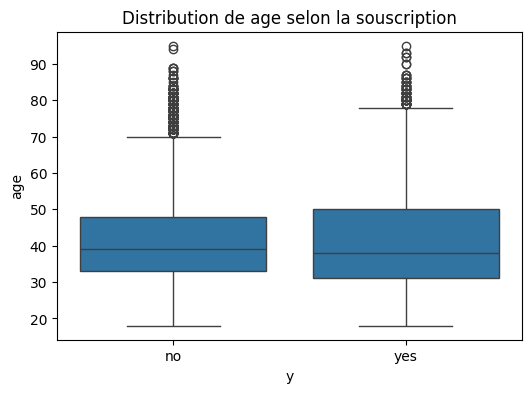

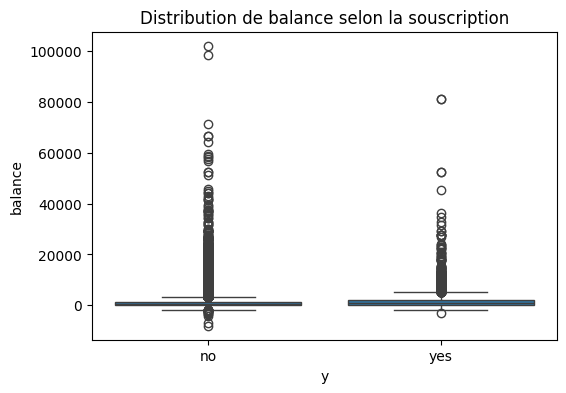

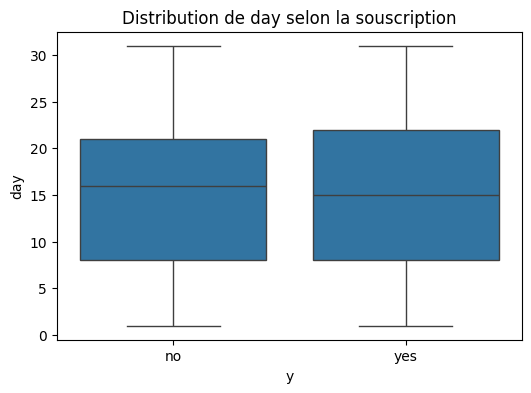

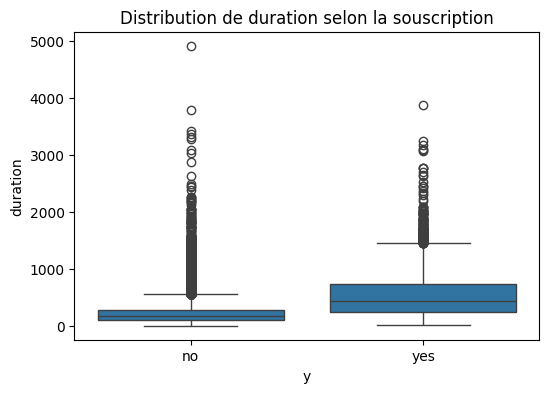

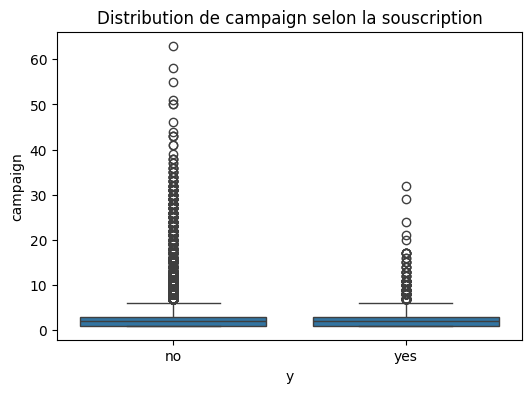

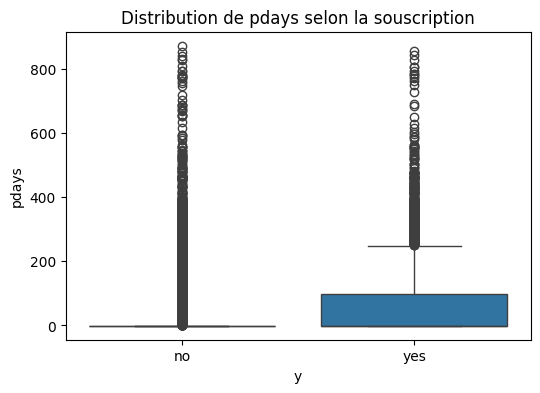

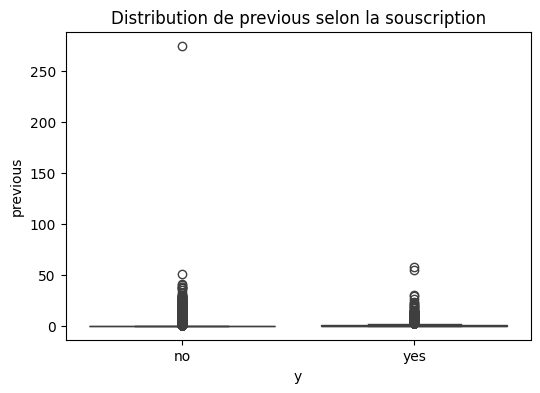

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in quantivars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"Distribution de {col} selon la souscription")
    plt.show()


###Commentaires
Âge (age) : Les clients ayant accepté l’offre (“yes”) sont légèrement plus âgés en moyenne (≈41,7 ans vs 40,8 ans). La différence est faible, mais il y a plus de dispersion chez les “yes”.

Solde bancaire (balance) : Les clients “yes” ont un solde moyen plus élevé (≈1 804 vs 1 304), indiquant que les clients avec plus d’épargne sont plus susceptibles d’accepter.

Jour du contact (day) : Très similaire entre les deux groupes, donc le jour du mois n’a pas d’effet visible sur la souscription.

Durée de l’appel (duration) : Les clients “yes” ont des appels beaucoup plus longs en moyenne (≈537s vs 221s). La durée semble fortement liée à la souscription (mais attention : risque de data leakage).

Nombre de contacts pendant la campagne (campaign) : Légèrement plus faible pour les “yes”, ce qui pourrait indiquer que les clients moins sollicités répondent mieux.

Jours depuis dernier contact (pdays) : Les “yes” ont un pdays plus élevé (≈69 vs 36), suggérant que certains clients ont été recontactés après plus longtemps et ont mieux répondu.

Contacts précédents (previous) : Les “yes” ont eu plus de contacts lors de campagnes passées (≈1,17 vs 0,50), ce qui montre qu’un historique d’interactions peut augmenter la probabilité d’acceptation.

###Interpétation

L’analyse des variables quantitatives par groupe montre que les clients ayant accepté l’offre sont légèrement plus âgés et disposent d’un solde bancaire moyen plus élevé. Ils ont également un historique de contacts plus riche et des appels plus longs, tandis que le nombre de contacts pendant la campagne et le jour du contact n’influencent que faiblement la souscription. Ces résultats suggèrent que les clients avec plus d’épargne, un historique d’interactions et un engagement plus important sont les segments à privilégier pour les campagnes futures.